<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Models for Unsupervised Learning

In this notebook we come back to unsupervised learning, and we will consider different methods for clustering.

## Data

We will use a real world dataset: the "[glass identification dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification)".  Originally created by the USA forensic science service, it includes 6 types of glass defined in terms of 8 features including their oxide content (i.e. Na, Fe, K, etc) and their refractive index.

To recap the methods and show them in a simpler setting, first we will only consider a subset containing just two classes of glass and two oxides. Then we will consider the full problem of 9-dimensional classification with 6 classes. In the beginning, we will do most of the analysis for you. Look at our code as a guide to what you will have to do!

Let's load the data. For your convenience, we are providing it in CSV form so we just need to load it.

The columns are the following: `Type` is the glass type; `Ri` is the refractive index; all others are oxide content.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_glass = pd.read_csv('/home/jovyan/Data/glass.csv')

df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Let's make a bar plot of the types. As you see below, it shows that type number 4 is missing from the data.

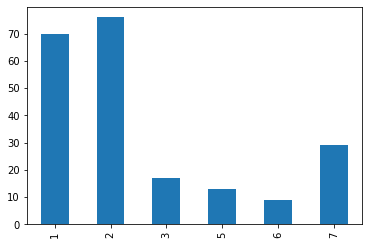

In [2]:
df_glass['Type'].value_counts(sort=False).plot(kind='bar')

In the beginning we will only consider types 1 and 7, and only columns 'Si' and 'Na'.

Let's define two variables: 'glass17' containing all columns for types 1 and 7, to be used to check our classification, and `glass_redux` that only contains columns 'Si' and 'Na' for types 1 and 7.

In [3]:
glass17=df_glass.loc[df_glass['Type'].isin([1,7]) ]
glass_redux = glass17.loc[:, ['Si','Na']]

Let's start by applying a KMeans classifier to the redux dataset. While in real life we wouldn't know how many clusters we need, this is a simplified example so let's go straight to using 2 clusters.

So, we start by importing the Kmeans classifier. We apply it to the `glass_redux` data, and store its predictions into variable `glass_redux_kmpred`.  We then do the same for Gaussian mixture, using appropriate variable names.

In [4]:
np.random.seed(42)  # setting the random seed makes the example reproducible
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(glass_redux)
glass_redux_kmpred = km.predict(glass_redux)


np.random.seed(43)  # setting the random seed makes the example reproducible
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, n_init=10)
gm.fit(glass_redux)
glass_redux_gmpred = gm.predict(glass_redux)

We will now plot the data, on the left using the true classes, in the centre using the KMeans classification, and on the right using the Gaussian mixture classification.

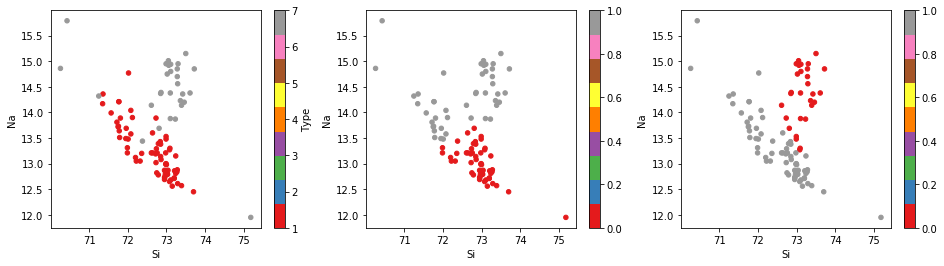

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3, figsize=(16,4))
glass17.plot('Si','Na',ax=ax[0],kind='scatter',c='Type',colormap='Set1')
glass17.plot('Si','Na',ax=ax[1],kind='scatter',c=glass_redux_kmpred,colormap='Set1')
glass17.plot('Si','Na',ax=ax[2],kind='scatter',c=glass_redux_gmpred,colormap='Set1')

Do you think that we got an acceptable result?  Approximately 3/4 of the points were correctly classified by KMeans. Whether this is acceptable or not, depends on the investigator's judgment and on any external constraints we might have (e.g., requirements from the client).

Gaussian mixtures did much better job, correctly classifying about 90% of the points.

Both KMeans and Gaussian mixtures are quite intuitive classifier. KMeans looks for compact clumps of points, the Gaussian mixtures - for gaussian-distributed clumps. Sometimes, however, our data does not clump so nicely, and may display more complex structures. Let's therefore try something slightly more complex: hierarchical clustering.

Recall at the course material we showed how to draw a dendrogram. Let's draw one for our problem. Run the cell below.

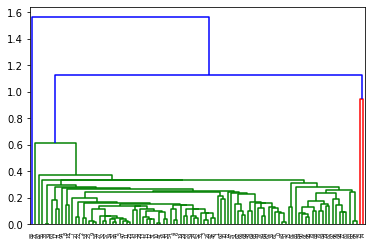

In [6]:
np.random.seed(44)  # setting the random seed makes the example reproducible

from scipy.cluster import hierarchy

hl = hierarchy.linkage(glass_redux,'single')
hierarchy.dendrogram(hl)
plt.show()

Let's now have a look at the above plot. The default colours highlight the top 3 clusters, but the idea in hierarchical clustering is that we can cut the tree at any height and obtain as many clusters as we want. We might at first think of using just 2 clusters as we did for KMeans and Gaussian mixtures. Would it work?

### Q1:

Which of the following statements is true (only one of them is true)?

 1. We can cut the tree at the height of about 1.4, and obtain 2 clusters. Each cluster will contain approximately half of the points.
 2. We can cut the tree at any height between 0.65 and 1.0, and obtain 2 clusters (marked by the blue and red colours in the plot). Each cluster will contain approximately half of the points.
 3. There is no height at which we can cut the tree in order to obtain 2 clusters, so that each is containing approximately half of the points.

In [7]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q1_answer = [6]

### START ANSWER HERE ###
Q1_answer = [3]
### END ANSWER HERE ###

In [8]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q1_answer)) == 'd02d4fea1e1905d8aba4b6bd53bfd42c':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader


Let's look at what happens in three cases above. We'll plot the data and colour the points according to the clusterings that we obtain by cutting at three different heights.

We will colour the points with the following scheme:
 1. the left panel shows the classification as resulting when the tree is cut at 1.4.
 2. for the centre panel, we cut the tree at 0.8;
 3. the right panel shows the colours resulting from when the tree is cut at 0.33.

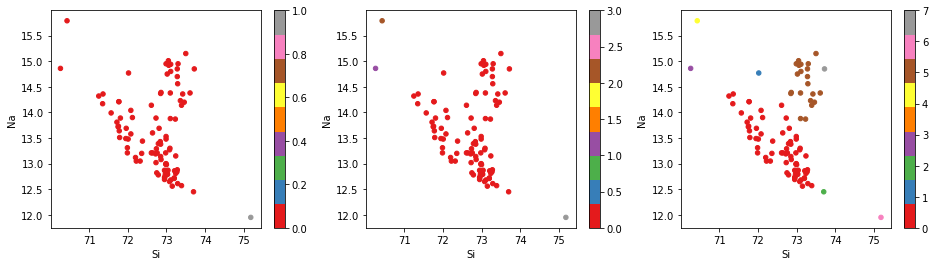

In [9]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
glass17.plot('Si','Na',ax=ax[0],kind='scatter',c=hierarchy.cut_tree(hl,height=1.4).squeeze(),colormap='Set1')
glass17.plot('Si','Na',ax=ax[1],kind='scatter',c=hierarchy.cut_tree(hl,height=0.8).squeeze(),colormap='Set1')
glass17.plot('Si','Na',ax=ax[2],kind='scatter',c=hierarchy.cut_tree(hl,height=0.33).squeeze(),colormap='Set1')

Look at plots and think again about the three choices in Q1. The behaviour that we see is due to how hierarchical clustering works: a single point that is widely separated from every other point make a cluster consisting only of that single point. So, hierachical clustering does not necessarily do better than simpler methods such as KMeans or Gaussian mixtures. The best method to apply to a problem depends both on the problem itself, and on what we want to learn. (For example: if we wanted to discard outliers, hierarchical clustering would have done a great job!)

Moreover, we have considered a simple two-dimensional setting, but many problems involve more than two features. Issues of data sparseness in a $n$-dimensional space become important, and therefore all methods may fare better or worse depending on the situation. In the second part of this notebook we will consider the glass dataset with all its features.

## The full problem

We will now consider the full 9-dimensional problem. We already loaded the data at the beginning of the notebook and we already have a `df_glass` variable that is a pandas dataframe containing all columns, including the type. We will use it mostly for plotting.

We will then define another dataframe, `glass_notype`, containing all columns, except the type. We will use it mostly for classification: we are doing unsupervised learning, so we must pretend that we don't know labels of the glass type!

In [10]:
glass_notype = df_glass.drop(columns='Type')

## KMeans clustering

Let's start with something easy, but what will show us some of the difficulties of working with data with more than two dimensions.

### Q2:

Apply KMeans clustering to the `glass_notype` data, and store the predicted classification into the `glass_kmpred` variable. 

Also, use `n_clusters=6` because we know there are six classes in total. 

(If you think that this is cheating, you're right: in unsupervised clustering we have little prior knowledge of how many classes there are. In theory we should try different numbers of clusters, and find a suitable metric to decide how many are enough for us. But the purpose of this assignment is to look at how different clustering methods work when applied to the same data, so let's assume that we already tried different numbers of clusters, or that we got this information from some external source.)

In [13]:
np.random.seed(42)  # setting the random seed makes the example reproducible

# (approx.4 lines of code)
### START ANSWER HERE ###
km = KMeans(n_clusters=6)
km.fit(glass_notype)
glass_kmpred = km.predict(glass_notype)
### END ANSWER HERE ###

In [14]:
print('glass_kmpred[:5]: ', glass_kmpred[:5])
print('glass_kmpred[-5:]: ', glass_kmpred[-5:])

glass_kmpred[:5]:  [0 2 2 2 2]
glass_kmpred[-5:]:  [5 5 5 5 5]


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> glass_kmpred[:5]</td> 
        <td> [0 2 2 2 2]
        </td> 
    </tr>
    <tr> 
        <td> glass_kmpred[-5:]</td> 
        <td> [5, 5, 5, 5, 5]
        </td> 
    </tr>
</table> 

In [ ]:
# nbgrader


Let's now plot the result of our classification, side to side with the true classes. We choose to display the `Si` and `Na` columns.

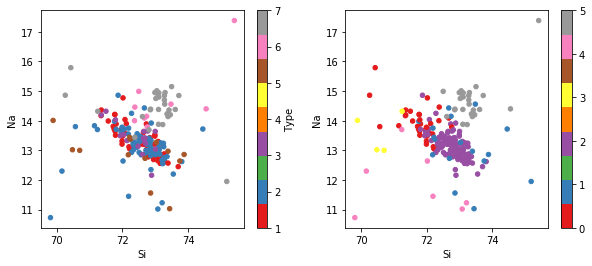

In [15]:
fig,ax = plt.subplots(1,2, figsize=(10,4))
df_glass.plot('Si','Na',ax=ax[0],kind='scatter',c='Type',colormap='Set1')
df_glass.plot('Si','Na',ax=ax[1],kind='scatter',c=glass_kmpred,colormap='Set1')

Let's look at the plots. It is quite difficult to compare them, because the KMeans class numbers don't match the true glass types. This is quite obvious, since KMeans cannot look at the 'type' column. However, with a bit of effort, we can see that type=7 broadly corresponds to class=5 (luckily, both are plotted in grey), but anything else is quite ambiguous.

We could develop some strategy to match `Type` and KMeans classes, but perhaps it is just better and easier to use the [adjusted rand score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn-metrics-adjusted-rand-score) that we already encountered in previous assignments.

In the next cell we calculate the adjusted rand score between the `df_glass['Type']` and the `glass_kmpred` classes.

In [16]:
from sklearn import metrics
ars_km = metrics.adjusted_rand_score(df_glass['Type'], glass_kmpred)

print('Adjusted rand score for KMeans: ', ars_km)

Adjusted rand score for KMeans:  0.262527884421083


## Gaussian mixtures

Gaussian mixtures offered an improvement over KMeans in the two-dimensional problem. Will they do so also in 9-dimensional case?

### Q3:

Apply Gaussian mixture clustering to the `glass_notype` data, and store the predicted classification into the `glass_gmpred` variable. Use 6 Gaussian components. Also, use `n_init=10` when instantiating the GaussianMixture class.

Then, calculate the adjusted rand score and store it in the `ars_gm` variable.

In [21]:
np.random.seed(42)  # setting the random seed makes the example reproducible

# (approx. 5 lines of code)

### START ANSWER HERE ###
gm = GaussianMixture(n_components=6, n_init=10)
gm.fit(glass_notype)
glass_gmpred = gm.predict(glass_notype)
ars_gm = metrics.adjusted_rand_score(df_glass['Type'], glass_gmpred)
### END ANSWER HERE ###

print('Adjusted rand score Gaussian Mixture: ', ars_gm)

Adjusted rand score Gaussian Mixture:  0.28092610350377933


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Adjusted rand score Gaussian Mixture</td> 
        <td> 0.28092610350377933
        </td> 
    </tr>
</table> 

In [22]:
# nbgrader


So the adjusted rand score is slightly better for Gaussian mixtures than it is for KMeans. However, is it good enough? It's now time to try hierarchical clustering!

## Hierarchical clustering

### Q4:

Apply hierarchical clustering to the `glass_notype` data, and store the predicted classification into the `glass_hcpred` variable. As above, use 6 clusters.

Instead of using `scipy.cluster.hierarcy.linkage` as in the two-dimensional problem, use [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html): it is used just like the KMeans and Gaussian mixture packages, and we have also already seen it in the course notebook. The only difference is that instead of having two different `.fit()` and `.predict()` methods, we only have one that does both: `.fit_predict()` (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering.fit_predict)).

Finally, calculate the adjusted rand score and store it in the `ars_hc` variable.

In [23]:
np.random.seed(42)  # setting the random seed makes the example reproducible

# (approx. 4 lines of code)
### START ANSWER HERE ###
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6)
glass_hcpred = hc.fit_predict(glass_notype)

ars_hc = metrics.adjusted_rand_score(df_glass['Type'], glass_hcpred)
### END ANSWER HERE ###

print('Adjusted rand score Hierarchical Clustering: ', ars_hc)

Adjusted rand score Hierarchical Clustering:  0.2620306253377113


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Adjusted rand score Hierarchical Clustering</td> 
        <td> 0.2620306253377113
        </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


That's interesting! The hierarchical clustering score is lower than the Gaussian mixture one, and on par with KMeans. Why is this?

### Q5:

Which of the statements is true?
  1. Hierarchical clustering is just not as powerful as Gaussian mixtures
  2. All three techniques are sensitive to outliers, and hierarchical clustering especially so
  3. Hierarchical clustering is the only one (out of the three techniques that we explored) that is sensitive to outliers

In [24]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q5_answer = [6]

### START ANSWER HERE ###
Q5_answer = [2]
### END ANSWER HERE ###

In [25]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q5_answer)) == '9dfcb71dad3ced71f805b7bb4cd9dfc0':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader


As we remarked above, we have been somewhat cheating so far by assuming that the number of clusters is 6. In a real world problem, the number of clusters would likely be unknown. Moreover, if we have a few outliers, then one could think of using more clusters than the number of true classes. The idea is that the outliers would get their own cluster, and do not interfere with the clustering of the bulk of data. Let's see if that is true. (Anyway, a better idea would be to clean the data and remove the outliers).

We will plot now the adjusted rand score for all three techniques, as a function of the number of clusters. To speed things up, we have already prepared the code for you.

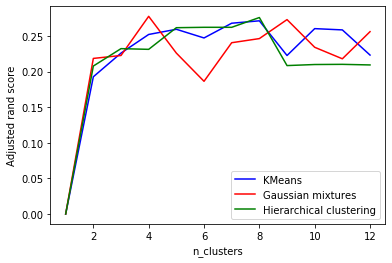

In [26]:
ars_km = []
ars_gm = []
ars_hc = []

np.random.seed(42)  # setting the random seed makes the example reproducible
for n in range(1,13):
    km = KMeans(n_clusters=n)
    km.fit(glass_notype)
    glass_kmpred = km.predict(glass_notype)
    ars_km.append( metrics.adjusted_rand_score(df_glass['Type'], glass_kmpred) )
   
    gm = GaussianMixture(n_components=n, n_init=10)
    gm.fit(glass_notype)
    glass_gmpred = gm.predict(glass_notype)
    ars_gm.append( metrics.adjusted_rand_score(df_glass['Type'], glass_gmpred) )

    hc = AgglomerativeClustering(n_clusters=n)
    glass_hcpred = hc.fit_predict(glass_notype)
    ars_hc.append( metrics.adjusted_rand_score(df_glass['Type'], glass_hcpred) )

x = np.linspace(1,12,12)
plt.plot(x,ars_km, color='blue',  label='KMeans')
plt.plot(x,ars_gm, color='red',   label='Gaussian mixtures')
plt.plot(x,ars_hc, color='green', label='Hierarchical clustering')
plt.xlabel('n_clusters')
plt.ylabel('Adjusted rand score')
plt.legend()
plt.show()

### Q6:

Look at the plot above, and then choose which of the statements below is true. (Only one of them is true).

 1. Gaussian mixtures method gets the maximum score with less clusters, so, for a principle of economy, it should be preferred.
 2. KMeans should be preferred: its score is approximately as good as that of hierarchical clustering when n_clusters<=8, and it is better when we ask for more clusters.
 3. Hierarchical clustering should be preferred: it has the highest score when n_clusters=6
 4. There is no clear winner. The three techniques have their strengths and pitfalls, and moreover, if we generated the same figure again with a different random number seed, we would get slightly different results. The adjusted rand score cannot be the only factor in making the decision which technique to use for the analysis, and we should also strive to understand the data: how compact are the clusters, how important are outliers, etc.

In [27]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q6_answer = [6]

### START ANSWER HERE ###
Q6_answer = [4]
### END ANSWER HERE ###

In [28]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q6_answer)) == '1bc8352531edbc3580fdd3e1bfe94353':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [ ]:
# nbgrader


### The elbow method

When doing unsupervised clustering in the real world, we don't have labels so we cannot apply adjusted rand score to check how we are doing. We must rely on some other measure. One possibility is to check how much variance we are catching with our classification as a function of the number of clusters. The more clusters we have, the more variance we can explain, but there is a point where the reward from adding more clusters starts to decrease.

In the next cell, we will plot the KMeans score that, in sklearn's implementation, is the opposite of the total variance. So, a higher score means that we have smaller clusters. You can appreciate that the score rises sharply when going from one to a few clusters, but then the improvement becomes milder. The "elbow" in the plot could probably be set somewhere between 3 and 6 clusters. It is the investigator's responsibility to make a choice, that should also be supported by some other information like, for example, the plots we have already made.

With the appropriate scores, similar plots can also be made for other methods than KMeans.

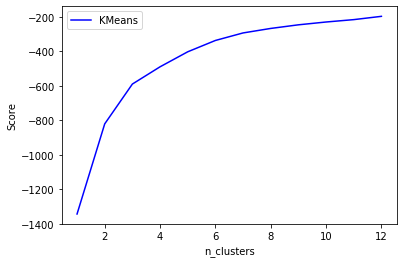

In [29]:
score_km = []

np.random.seed(42)  # setting the random seed makes the example reproducible
for n in range(1,13):
    km = KMeans(n_clusters=n)
    km.fit(glass_notype)
    glass_kmpred = km.predict(glass_notype)
    score_km.append( km.score(glass_notype))
   
x = np.linspace(1,12,12)
plt.plot(x,score_km, color='blue',  label='KMeans')
plt.xlabel('n_clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

## Dimensionality reduction

In the last part of this notebook, we will take a look at dimensionality reduction using principal component analysis (PCA). We ask ourselves, can we improve our classification by using PCA to focus on the most informative components, and getting rid of the noise? Let's try.

### Q7:

Apply PCA for `glass_notype` data.

**Hints**:
* import `PCA` from `sklearn.decomposition`. 
* define an instance of the [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and use only 3 components (`n_components=3`). 
* apply the `.fit()` method to your data (`glass_notype`)
* apply the `.transform()` method to the same data, and store the result in a variable called `glass_pca`.

In [30]:
# (approx. 4 lines of code)

### START ANSWER HERE ###
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(glass_notype)
glass_pca = pca.transform(glass_notype)
### END ANSWER HERE ###

In [31]:
glass_pca[0]

array([-1.43142469, -1.10211499, -1.0669584 ])

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> glass_pca[0]</td> 
        <td> array([-1.43142469, -1.10211499, -1.0669584 ])
        </td> 
    </tr>
</table> 

In [32]:
# nbgrader


### Q8:

Now let's apply again KMeans to the PCA transformed variables that you stored in `glass_pca`. Look at how you did KMeans classification before, and do the same here. Use `n_clusters=6`.

Put your predicted classification in a variable called `glass_pcakmpred`, and the adjusted rand score in a variable called `ars_pcakm`.



In [33]:
np.random.seed(42)  # setting the random seed makes the example reproducible

# (approx. 4 lines of code)

### START ANSWER HERE ###
km2 = KMeans(n_clusters=6)
km2.fit(glass_pca)

glass_pcakmpred = km2.predict(glass_pca)
ars_pcakm = metrics.adjusted_rand_score(df_glass['Type'], glass_pcakmpred)
### END ANSWER HERE ###

print('Adjusted rand score PCA KMeans: ', ars_pcakm)

Adjusted rand score PCA KMeans:  0.27253425743774695


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Adjusted rand score PCA KMeans</td> 
        <td> 0.27253425743774695
        </td> 
    </tr>
</table> 

In [34]:
# nbgrader cell


Nice! With just three principal components we obtained a higher adjusted rand score than when we were using the full 9-dimensional, raw data. Could we get a higher score by using less, or more principal components? Feel free to experiment if you wish!

Let's now plot the classification. Since this notebook is already quite long, we will do it for you. On the left panel we will put the true glass types, as a function of Si and Na content.
In the middle panel we will put KMeans classes as a function of the first two PCA classes.
In the right panel we will put again KMeans classes, but displayed as a function of the first and the third PCA classes. 

Look at the structures that appear in the PCA plots: the PCA method is revealing some information that would otherwise be very difficult to visualize, because it is hidden in a high-dimensional space.

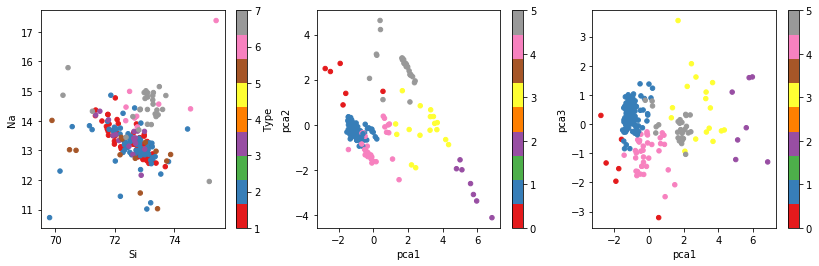

In [35]:
pca_df = pd.DataFrame({'pca1':glass_pca[:,0],'pca2':glass_pca[:,1],'pca3':glass_pca[:,2]})
fig,ax = plt.subplots(1,3, figsize=(14,4))
df_glass.plot('Si','Na',ax=ax[0],kind='scatter',c='Type',colormap='Set1')
pca_df.plot('pca1','pca2',ax=ax[1],kind='scatter',c=glass_pcakmpred,colormap='Set1')
pca_df.plot('pca1','pca3',ax=ax[2],kind='scatter',c=glass_pcakmpred,colormap='Set1')

# Good job!